In [1]:
# Preparations
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [2]:
dta = pd.read_csv('data/clean_data.csv')
dta_dummy = pd.read_csv('data/dummy_data.csv')
dta_active = pd.read_csv('data/activity_data.csv')

# Dementia Prevention
## Morgan Zimmerman

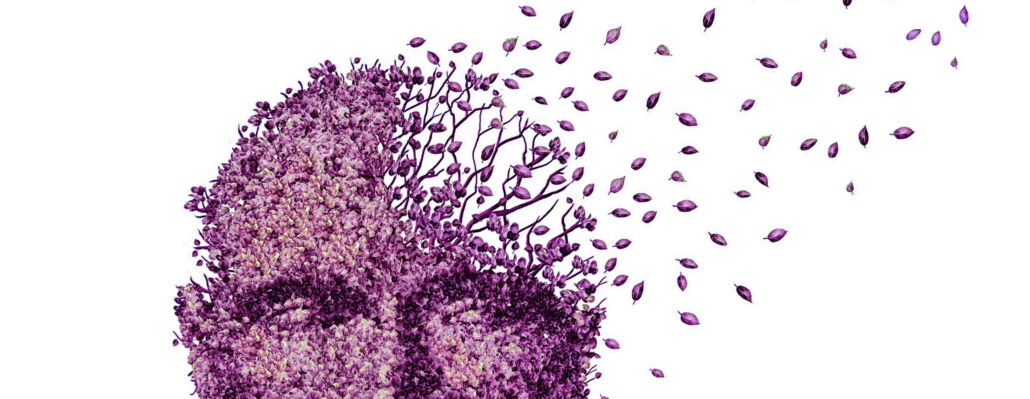

## Problem -
* Research on dementia prevalence and potentially related risk factors is $\color{red}{\text{scarce}}$
* There are $\color{red}{\text{no}}$ disease-modifying agents for dementia
* Prevention and intervention measures for $\color{red}{\text{high-risk}}$
 populations is desired

One of the topics I'm interested in under health as a whole, is prevention and intervention strategies for healthy aging. One disease that falls under that category is dementia. Currently, there are no disease-modifying (or curing) agents for dementia. The goal of my project is to analyze various lifestyle factors and their role in either the prevention or mitigation of dementia onset in an individual.

## Background - 
* Evidence of $\color{red}{\text{decline}}$ in the prevalence of dementia in high-income countries
* Lifestyle activities that optimize use of cognitive strategies and healthy dietary patterns might help $\color{red}{\text{preserve}}$ cognition

For context as to why this is an important question to look at, is that there’s evidence that prevalence of dementia in high-income countries is declining but we aren’t seeing that downward trend in many places around the world. There’s also evidence that partaking in certain daily lifestyle activities that continue to optimize cognitive function as you age is known to help prevent the onset of dementia. It is also important to tailor prevention programs to local context and risk factors. With an expansion on this kind of research, we can design effective interventions and ultimately it will lead to more appropriate public health policies regarding healthy aging.

## Data -
* Public NIH dataset
* Focused on 686 individuals in Indonesia (486 without dementia, 200 with dementia)
* Includes demographics, biomarkers, and lifestyle factors (i.e., activity, diet)

In [3]:
dta.head(10)

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Marital_status,Income,Occupation_class,...,Vegetable,Vegetable_category,Fruit,Fruit_category,Salted_fish,Salted_fish_category,Instant_noodle,Instant_noodle_category,Tempe,Tempe_category
0,80001,Dementia,70.0,60-74,3.0,0-6 years,Female,Married,No Income,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
1,80002,Normal,63.0,60-74,0.0,0-6 years,Female,Single,< monthly minimum wage,profesional,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
2,80003,Normal,64.0,60-74,6.0,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
3,80004,Normal,62.0,60-74,6.0,0-6 years,Female,Married,≥ monthly minimum wage,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent
4,80005,Dementia,78.0,>75,3.0,0-6 years,Female,Married,No Income,housewife,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent
5,80006,Dementia,78.0,>75,0.0,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,1 time/day,Frequent,Few times/week,Frequent,Every Meal,Frequent,Few times/week,Non-Frequent
6,80007,Normal,75.0,>75,6.0,0-6 years,Female,Single,No Income,housewife,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
7,80009,Normal,64.0,60-74,4.0,0-6 years,Female,Married,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
8,80010,Dementia,66.0,60-74,2.0,0-6 years,Female,Single,No Income,notworking,...,3-4 times/week,Non Frequent,3-4 times/week,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
9,80011,Dementia,73.0,60-74,0.0,0-6 years,Female,Single,No Income,housewife,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent


The National Institutes of Health data I found is on 686 individuals from Indonesia. Indonesia is a middle-income country with large numbers of elders and limited healthcare resources. (DOWN) The data seeks to identify the modifiable risk factors for dementia, focusing on demographic, health, and lifestyle risk factors.

## Considered Methods - 
* $\color{red}{\text{Data Wrangling}}$
    * _Clean data_
    * _Rename variables_
    * _Convert data types_
    * _Handle categorical variables_
    * _Produce subset dataframes_

* $\color{red}{\text{Data Exploration}}$
    * _Ask questions of data_
    * _Plot distributions, other visualizations_
    * _Detect missingness, outliers_
    * _Calculate preliminary statistics_
* $\color{red}{\text{Machine Learning}}$
    * _Sampling_
    * _Split train/test data_
    * _Run models_
    * _Calculate predictive accuracies_

When planning how to approach this project, I considered a number of methods within the data wrangling, data exploration, and machine learning stages. This included renaming variables, converting data types and representing dummy variables, as well as creating some subsets that were solely demographic, or activity, or diet focused. (DOWN) In terms of data exploration, I started by asking questions about the data like we’ve done in class. So things like what is the unit of observation, is there missingness in the data, what are some frequencies or value distributions. Lastly, in regards to machine learning, I considered sampling data, splitting into train and test datasets, and comparing models for the best fit and representation of the data.

In [4]:
## Methods Used - Data Wrangling
# Import the Excel sheet
dta_messy = pd.read_excel('data/Data_Sheet_1.xlsx',
                   header=[0])
print('Methods Used - Data Wrangling')
# Preview the first ten rows Excel sheet
dta_messy.head(5)

Methods Used - Data Wrangling


,No.,Participant,Category,Age,Unnamed: 4,Education,Unnamed: 6,Sex,Marital Status,Income,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,NaN,NaN,NaN,Years,Category,Years,Category,NaN,NaN,NaN,...,Vegetable,Vege Category,Fruit,Fruit Category,Salted Fish,Salted Fish Category,Instant Noodle,Int.Noodle Category,Tempe,Tempe Category
1,1.0,80001.0,Dementia,70,60-74,3,0-6 years,Female,Married,No Income,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
2,2.0,80002.0,Normal,63,60-74,0,0-6 years,Female,Single,< monthly minimum wage,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent
3,3.0,80003.0,Normal,64,60-74,6,0-6 years,Female,Married,No Income,...,3-4 times/week,Non Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,NaN,NaN,NaN,NaN
4,4.0,80004.0,Normal,62,60-74,6,0-6 years,Female,Married,≥ monthly minimum wage,...,2 times/day,Frequent,Sometimes,Non Frequent,Sometimes,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent


In [5]:
print('Dealing with categorical variables -')
dta_dummy.head(5)

Dealing with categorical variables -


,Participant_ID,Age_yrs,Education_yrs,BP_sistol,BP_diastol,BMI,GDS,Glucose,Triglyceride,HDL,...,Vegetable_category_Frequent,Vegetable_category_Non Frequent,Fruit_category_Frequent,Fruit_category_Non Frequent,Salted_fish_category_Frequent,Salted_fish_category_Non-Frequent,Instant_noodle_category_Frequent,Instant_noodle_category_Non-Frequent,Tempe_category_Frequent,Tempe_category_Non-Frequent
0,80001,70.0,3.0,150.0,60.0,19.95,3.0,81.0,90.0,67.0,...,1,0,0,1,0,1,0,1,0,1
1,80002,63.0,0.0,140.0,90.0,22.04,1.0,82.0,61.0,70.0,...,0,1,0,1,0,1,0,1,0,1
2,80003,64.0,6.0,150.0,100.0,22.02,0.0,NaN,NaN,NaN,...,0,1,0,1,0,1,0,0,0,0
3,80004,62.0,6.0,120.0,80.0,28.77,0.0,86.0,183.0,42.0,...,1,0,0,1,0,1,1,0,0,1
4,80005,78.0,3.0,210.0,100.0,24.79,6.0,95.0,229.0,60.0,...,1,0,0,1,0,1,0,1,0,1


What I have done so far in terms of data wrangling has consisted mostly of formatting the data into a clean pandas dataframe. As you can see, when initially reading in the Excel file data, I ran into the issue of multiple rows of variable names, so the first step was reforming variable names. Secondly, one of the obstacles I have had throughout the data cleaning process is that a good bit of the dataset is categorical data.

Methods Used - Data Exploration


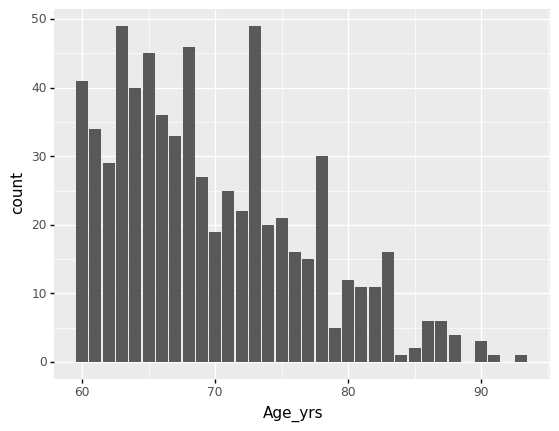

<ggplot: (8782779025755)>

In [6]:
## Methods Used - Data Exploration
print('Methods Used - Data Exploration')
(ggplot(dta,aes(x='Age_yrs')) +
  geom_bar())

Text(0.5, 0.98, 'Distribution of Activity Totals for Individuals without (0) and with (1) Dementia')

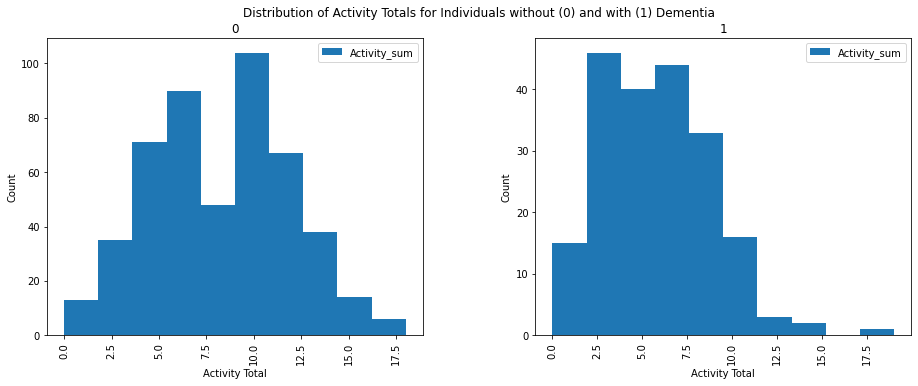

In [7]:
dta_active['Activity_sum']= dta_active.iloc[:, -31:-1].sum(axis=1)
dta_act = dta_active.hist(column='Activity_sum', 
                               by='Dementia', 
                               figsize=(15, 5.5),
                               legend=True)
for total in dta_act.flatten():
    total.set_xlabel("Activity Total")
    total.set_ylabel("Count")
pl.suptitle('Distribution of Activity Totals for Individuals without (0) and with (1) Dementia')

PRELIMINARY RESULTS - Age, AMT Scores


Text(0, 0.5, 'Average AMT Score')

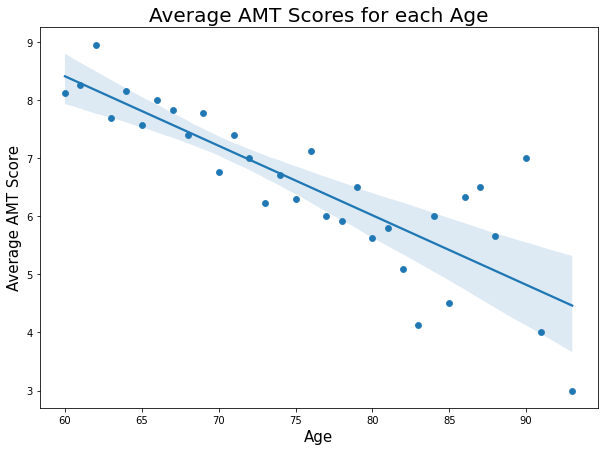

In [8]:
print('PRELIMINARY RESULTS - Age, AMT Scores')
age_avgscore = dta.groupby('Age_yrs', as_index=False)['AMT'].mean()
age_amt = age_avgscore.plot.scatter(x='Age_yrs',
                      y='AMT',
                      figsize=(10, 7))
sns.regplot('Age_yrs', 'AMT', data = age_avgscore)
plt.title('Average AMT Scores for each Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Average AMT Score', fontsize=15)

In [9]:
print("'sklearn' Linear Regression Model")
print('\n')

# model on averages
x=age_avgscore['Age_yrs'].to_numpy().reshape((-1, 1))
y=age_avgscore['AMT'].to_numpy()
model1 = LinearRegression()
model1.fit(x, y)
r_sq1 = model1.score(x, y)
print('R-squared:', r_sq1)
print('Intercept Estimate:', model1.intercept_)
print('Slope:', model1.coef_)
print('\n')

'sklearn' Linear Regression Model


R-squared: 0.7011642281300936
Intercept Estimate: 15.603663867477344
Slope: [-0.11978442]




To explore the data, I started by plotting some frequencies and distributions, which was helpful in getting a better idea visually of the scope of participants I was dealing with. Another thing I did was sum the total number of activities a person participated in (whether social, intellectual, physical, etc.). This graph breaks up those without dementia on the left and those with dementia on the right and looks at the distribution of activity totals among those groups. You can see that those with dementia have a more left-skewed distribution, in other words those with dementia were associated with less active lifestyles. Likewise, another variable of interest is AMT scores, which stands for Abbreviated Mental Test. This is a rapid assessment of elderly patients for the possibility of dementia. This graph represents the average AMT score for each unique age for which we see observations for in the dataset. There's a clear downward trend of AMT scores as a result of getting older, which shouldn't be a surprise to most. I also implemented sklearn’s Linear Regression model on each age’s average AMT scores, which produced these results. 

Methods Used - Machine Learning


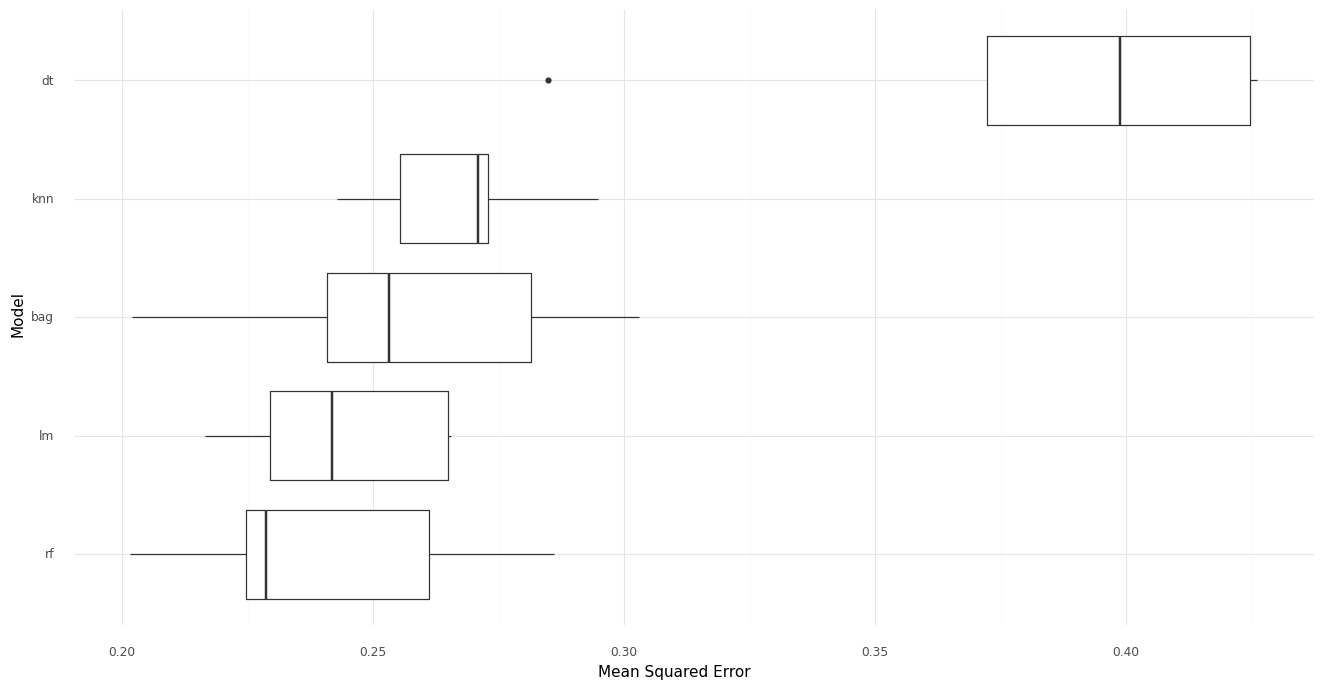

<ggplot: (8782746290306)>

In [10]:
print('Methods Used - Machine Learning')

dta1 = dta_active.dropna()
sample = dta1.groupby("Dementia").sample(n=190, random_state=1988)
sample.columns

y = sample['Dementia']
X = sample[['Reads', 'Surfs_Internet', 'Plays_Games', 'Invests', 'Discusses',
                    'Writes_Paints', 'Plays_Instrument', 'Intellect_Other',
                    'Attends_Class', 'Joins_Center', 'Volunteers', 'Watches_Entertainment',
                    'Meets_People', 'Sees_Dramas', 'Sings', 'Attends_Religion', 'Social_Other',
                    'Watches_TV', 'Listens_Music', 'Shops', 'Cooks', 'Fishes', 'Has_Pets',
                    'Gets_Massages', 'Recreation_Other', 'Does_Yoga', 'Strenuous_Aerobic', 
                    'Light_Aerobic', 'Strenuous_Aerobic', 'Stretches_Tones', 'Physical_Other']]

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1988)

scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)
train_X = pd.DataFrame(train_X,columns=col_names)

fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)
use_metrics = ["neg_mean_squared_error"]

lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(x="Model",y="Mean Squared Error") +
    coord_flip() +
    theme_minimal() +
    theme(figure_size=(16, 8))
)

Lastly, the machine learning stage of my project is very much still in progress. But as a preliminary analysis, specifically on only activity level predictors, so things like does the individual read, play an instrument, get outside, exercise, cook, etc., I tested these 5 models and found that the random forest model was performing best in terms of predicting dementia as an outcome. So, the plan is to continue down that route and also look at some predictor models for dementia as an outcome.


## Conclusion -
* Individuals without dementia had $\color{red}{\text{higher activity levels}}$ than those with dementia 
    * Goal: Locate categories of activity that are more influential on dementia prevention than others

* AMT scores $\color{red}{\text{declined}}$ with age
    * Goal: Replicate these results separately on those with and without dementia
* Linear Regression model performs $\color{red}{\text{best}}$ when using only activity levels as predictors for dementia
    * Goal: Replicate the comparison of models on various groups of predictors (demographics only, diet only, etc.)

So again, just some preliminary conclusions, but it’s clear that individuals without dementia had higher activity levels than those with dementia. I plan to expand on that conclusion by honing in on what specific categories of activity are more influential specifically for dementia prevention. Is it going for a 20 minute walk or is playing a board game with family more effective in maintaining cognition as one ages? Secondly, AMT scores declined with age. Again, not a super surprising result, but one that I want to take further and actually separate by the two groups (dementia and no dementia) to see if the rate of decline is more rapid in those with dementia and what exactly those timelines look like in reference to age. Lastly, in the machine learning realm of things, I shared that the regression model was performing best when only using activity variables as predictors, so the next step is to replicate those models on various predictor groups (such as just demographics, just diet patterns, etc.) and then later as a whole dataset to create a solid prediction model.

## Lessons Learned -
* Modeling and intrepration on a dataset that is primarily $\color{red}{\text{categorical}}$
* $\color{red}{\text{"Bad"}}$ predictive accuracy is also informative
* Where I'm going from here

Lastly, I want to touch on a few things I’ve learned so far throughout this project. The first is just understanding the modeling process, and more importantly the interpretation of various results, when I’m dealing with both categorical predictors and a categorical outcome variable. My predictor model thus far produces low predictive accuracy scores and so I’m trying to distinguish between ‘have I done something wrong in terms of proper representation’ or ‘should this be interpreted as maybe dementia onset is more random than I’ve tried to predict it as’. Is dementia as an outcome just something that develops quite drastically in a wide range of individuals. So again, that “bad” predictive accuracy may be quite informative, I just am learning how to interpret that appropriately as I continue on with the machine learning stage of the project.